# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import cv2
from PIL import Image
from skimage.io import imread

import os
import random

In [2]:
from tensorflow.keras import layers, models
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import warnings
warnings.filterwarnings("ignore")

# 2. Dataset Preparation

## 2-1. Extract Class Names

In [6]:
data_dir = '/kaggle/input/rice-image-dataset/Rice_Image_Dataset'

In [7]:
class_names = [name for name in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, name))]

print('Class Names:', class_names)

Class Names: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']


## 2-2. Extract Image Paths

In [9]:
class_image_paths = {
    'Arborio': [],
    'Basmati': [],
    'Ipsala': [],
    'Jasmine': [],
    'Karacadag': []
}

for class_name in class_names:

    class_dir = f"{data_dir}/{class_name}"
    
    for file in os.listdir(class_dir):
        
        if file.endswith(".png") or file.endswith(".jpg"): 
            class_image_paths[class_name].append(
                os.path.join(class_dir, file)
            )

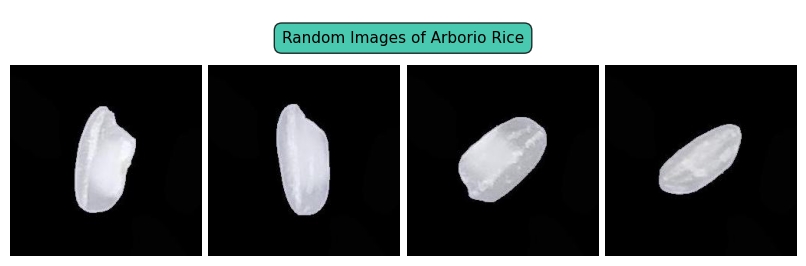

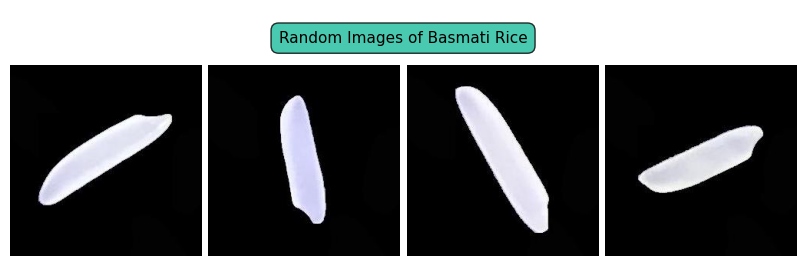

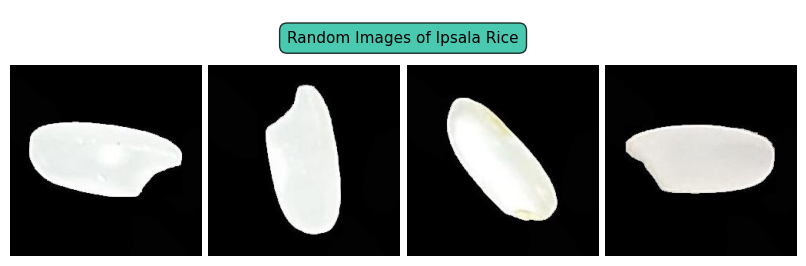

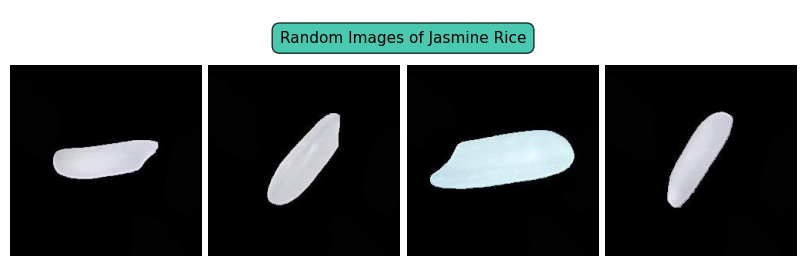

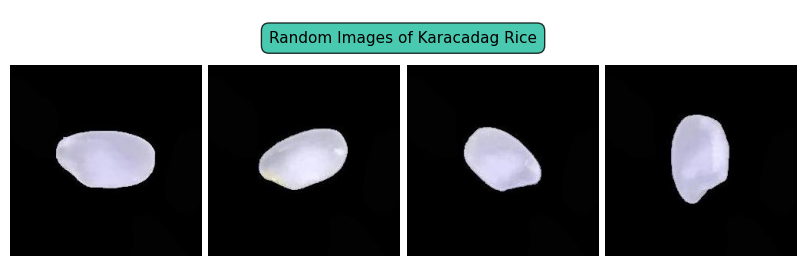

In [11]:
for class_name in class_names:
    fig = plt.figure(figsize=(8, 3))
    gs = gridspec.GridSpec(2, 4, height_ratios=[0.1, 0.95])

    title_ax = fig.add_subplot(gs[0, :])
    title_ax.text(0.5, 0, f"Random Images of {class_name} Rice",
                  fontsize=11, ha='center', va='center',
                  bbox=dict(facecolor='#1ABC9C', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.8))
    title_ax.axis('off')

    for j in range(4):
        ax = fig.add_subplot(gs[1, j])
        random_img = random.choice(class_image_paths[class_name])
        img = imread(random_img)
        ax.imshow(img)
        ax.axis('off')

    plt.tight_layout(pad=0.5)
    plt.show()

## 2-3. Create DataFrames for Data Generators

In [13]:
print(f"Number of Samples in Classes:")

for class_name in class_names:
    print(f"{class_name:9} = {len(class_image_paths[class_name])}")

Number of Samples in Classes:
Arborio   = 15000
Basmati   = 15000
Ipsala    = 15000
Jasmine   = 15000
Karacadag = 15000


In [19]:
# 75% of the Data
train_df = pd.concat([
    pd.DataFrame({'image': class_image_paths['Arborio'][:11250]  , 'label': 'Arborio'}), 
    pd.DataFrame({'image': class_image_paths['Basmati'][:11250]  , 'label': 'Basmati'}), 
    pd.DataFrame({'image': class_image_paths['Ipsala'][:11250]   , 'label': 'Ipsala'}), 
    pd.DataFrame({'image': class_image_paths['Jasmine'][:11250]  , 'label': 'Jasmine'}), 
    pd.DataFrame({'image': class_image_paths['Karacadag'][:11250], 'label': 'Karacadag'})
])

# 20% of the Data
val_df = pd.concat([
    pd.DataFrame({'image': class_image_paths['Arborio'][11250:14250]  , 'label': 'Arborio'}), 
    pd.DataFrame({'image': class_image_paths['Basmati'][11250:14250]  , 'label': 'Basmati'}), 
    pd.DataFrame({'image': class_image_paths['Ipsala'][11250:14250]   , 'label': 'Ipsala'}), 
    pd.DataFrame({'image': class_image_paths['Jasmine'][11250:14250]  , 'label': 'Jasmine'}), 
    pd.DataFrame({'image': class_image_paths['Karacadag'][11250:14250], 'label': 'Karacadag'})
])

# 5% of the Data
test_df = pd.concat([
    pd.DataFrame({'image': class_image_paths['Arborio'][14250:15000]  , 'label': 'Arborio'}), 
    pd.DataFrame({'image': class_image_paths['Basmati'][14250:15000]  , 'label': 'Basmati'}), 
    pd.DataFrame({'image': class_image_paths['Ipsala'][14250:15000]   , 'label': 'Ipsala'}), 
    pd.DataFrame({'image': class_image_paths['Jasmine'][14250:15000]  , 'label': 'Jasmine'}), 
    pd.DataFrame({'image': class_image_paths['Karacadag'][14250:15000], 'label': 'Karacadag'})
])

In [23]:
print('Number of Train Data:', len(train_df))
print('Number of Validation Data:', len(val_df))
print('Number of Test Data:', len(test_df))

Number of Train data: 56250
Number of Validation data: 15000
Number of Test data: 3750


## 2-4. Create Data Generators

In [26]:
print('Random Image Shapes:')

for i in range(1,6):
    random_img_path = random.choice(random.choice(list(class_image_paths.values())))
    image = cv2.imread(random_img_path)
    print(f'{i}. {image.shape[:2]}')

Random Image Shapes:
1. (250, 250)
2. (250, 250)
3. (250, 250)
4. (250, 250)
5. (250, 250)


In [28]:
img_height, img_width = (250, 250)
batch_size = 128

In [30]:
train_generator = ImageDataGenerator(rescale=1/255)
val_generator   = ImageDataGenerator(rescale=1/255)
test_generator  = ImageDataGenerator(rescale=1/255)

In [32]:
train_data = train_generator.flow_from_dataframe(
    dataframe = train_df,
    class_mode = "categorical",
    x_col = "image",
    y_col = "label",
    batch_size = batch_size,
    seed = 42,
    shuffle = True,
    target_size = (img_height,img_width)
)

val_data = val_generator.flow_from_dataframe(
    dataframe = val_df,
    class_mode = "categorical",
    x_col = "image",
    y_col = "label",
    batch_size = batch_size,
    seed = 42,
    shuffle = True,
    target_size = (img_height,img_width)
)

test_data = test_generator.flow_from_dataframe(
    dataframe = test_df,
    class_mode = "categorical",
    x_col = "image",
    y_col = "label",
    batch_size = batch_size,
    seed = 42,
    shuffle = True,
    target_size = (img_height,img_width)
)

Found 56250 validated image filenames belonging to 5 classes.
Found 15000 validated image filenames belonging to 5 classes.
Found 3750 validated image filenames belonging to 5 classes.


# 3. Modeling

## 3-1. Build Model

In [36]:
# The model is based on the AlexNet architecture.

def build_model():
    
    inp = layers.Input((250, 250, 3))
    out = layers.Conv2D(96, 11, 4, activation='relu')(inp)
    out = layers.BatchNormalization()(out)
    out = layers.MaxPooling2D(3, 2)(out)
    out = layers.Conv2D(256, 5, 1, activation='relu')(out)
    out = layers.BatchNormalization()(out)
    out = layers.MaxPooling2D(3, 2)(out)
    out = layers.Conv2D(384, 3, 1, activation='relu')(out)
    out = layers.Conv2D(384, 3, 1, activation='relu')(out)
    out = layers.Conv2D(256, 3, 1, activation='relu')(out)
    out = layers.MaxPooling2D(3, 2)(out)
    out = layers.Flatten()(out)
    out = layers.Dense(4096, activation='relu')(out)
    out = layers.Dropout(0.5)(out)
    out = layers.Dense(4096, activation='relu')(out)
    out = layers.Dropout(0.5)(out)
    out = layers.Dense(5, activation='softmax')(out)

    model = models.Model(inputs=inp, outputs=out)

    return model

In [38]:
model = build_model()

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 250, 250, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 60, 60, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 60, 60, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 29, 29, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 25, 25, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 25, 25, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │          20,485 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,748,805 (94.41 MB)

 Trainable params: 24,748,101 (94.41 MB)

 Non-trainable params: 704 (2.75 KB)

## 3-2. Model Training

In [41]:
model.compile(
    loss      = BinaryCrossentropy(),
    optimizer = Adam(learning_rate=0.001), 
    metrics   = ['accuracy']
)

In [43]:
history = model.fit(
    train_data, 
    epochs = 2, 
    validation_data = val_data
)

Epoch 1/2
440/440 ━━━━━━━━━━━━━━━━━━━━ 2390s 5s/step - accuracy: 0.8052 - loss: 0.3191 - val_accuracy: 0.7489 - val_loss: 0.2310
Epoch 2/2
440/440 ━━━━━━━━━━━━━━━━━━━━ 1874s 4s/step - accuracy: 0.9662 - loss: 0.0406 - val_accuracy: 0.9354 - val_loss: 0.0802


## 3-3. Evaluate Model on Test Data

In [45]:
test_loss, test_acc = model.evaluate(test_data)

30/30 ━━━━━━━━━━━━━━━━━━━━ 25s 822ms/step - accuracy: 0.9382 - loss: 0.0744


In [47]:
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.9363
Test Loss: 0.0841


## 3-4. Visualization of Model Predictions

In [50]:
sample_images, sample_labels = next(iter(test_data))

images = sample_images[:4]

labels = sample_labels[:4]
preds = model.predict(images)

real_labels = np.argmax(labels, axis=1)
pred_labels = np.argmax(preds, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


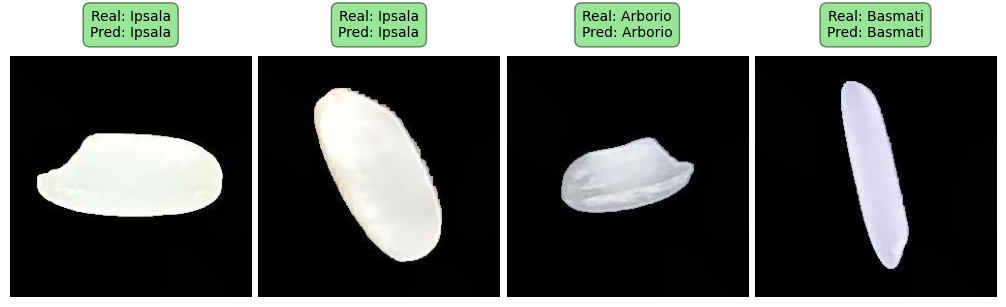

In [52]:
plt.figure(figsize=(10, 3))

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i])
    plt.axis('off')
    
    real_label = class_names[real_labels[i]]
    pred_label = class_names[pred_labels[i]]
        
    plt.title(
        f"Real: {real_label}\nPred: {pred_label}",
        fontsize=10,
        color='black',
        pad=10,
        y = 1.02,
        bbox=dict(
            boxstyle="round,pad=0.5", 
            facecolor='limegreen' if real_label == pred_label else 'salmon', 
            alpha=0.5
        )
    )

plt.tight_layout(pad=0.5)
plt.show()